In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [115]:
%matplotlib inline

### store 1, item 9에 대한 회귀분석

In [51]:
data = pd.read_csv('data/sample_df.csv')

In [52]:
data.columns

Index(['date', 'item_nbr', 'logunits', 'store_nbr', 'units', 'station_nbr',
       'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'year', 'month', 'day', 'week', 'weekday', 'quarter', 'holiday',
       'blackfriday', 'isholiday', 'isblackfriday'],
      dtype='object')

In [57]:
data = data[data['units'].notna()]

In [58]:
w_col = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',\
'snowfall', 'preciptotal','stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',]

In [59]:
dfX = data.filter(w_col)
dfy = data.filter(['units'])

### ExtraTreesClassifier 독립변수 중요도 파악

In [112]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=250, random_state=0)
model.fit(dfX, dfy)
print(model.feature_importances_)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.07601909 0.07548888 0.06873956 0.08160384 0.07641916 0.0723895
 0.05378206 0.02585628 0.02816513 0.04950458 0.07746286 0.07873216
 0.07872911 0.07742545 0.07968235]


In [113]:
importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 3 depart (0.081604)
2. feature 14 avgspeed (0.079682)
3. feature 11 sealevel (0.078732)
4. feature 12 resultspeed (0.078729)
5. feature 10 stnpressure (0.077463)
6. feature 13 resultdir (0.077425)
7. feature 4 dewpoint (0.076419)
8. feature 0 tmax (0.076019)
9. feature 1 tmin (0.075489)
10. feature 5 wetbulb (0.072389)
11. feature 2 tavg (0.068740)
12. feature 6 heat (0.053782)
13. feature 9 preciptotal (0.049505)
14. feature 8 snowfall (0.028165)
15. feature 7 cool (0.025856)


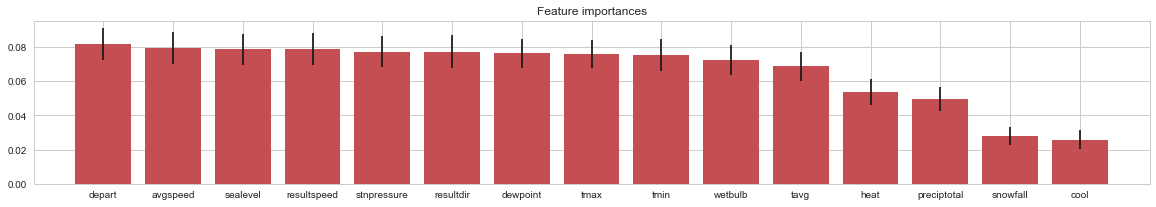

In [116]:
fr = dfX.columns[np.argsort(model.feature_importances_)[::-1]].values.tolist()
print("Feature ranking:")
for f in range(dfX.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], fr[f], importances[indices[f]]))
    
plt.figure(figsize=(20, 3))
plt.title("Feature importances")
plt.bar(range(dfX.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
#plt.xticks(range(dfX.shape[1]), indices)
plt.xticks(range(dfX.shape[1]), fr)
plt.xlim([-1, dfX.shape[1]])
plt.show()

In [ ]:
# depart, avgspeed, sealevel

### LogisticRegression 사용하여 중요변수 파악

In [117]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(dfX, dfy)
print(("Num Features: %d") % fit.n_features_)
print(("Selected Features: %s") % fit.support_)
print(("Feature Ranking: %s") % fit.ranking_)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features: 3
Selected Features: [False False False False False False False False  True False False False
  True False  True]
Feature Ranking: [11  9  7 12 10  8  6  3  1  2  4  5  1 13  1]


In [118]:
dfX.columns[fit.support_]

Index(['snowfall', 'resultspeed', 'avgspeed'], dtype='object')

### DecisionTreeRegressor사용하여 중요변수 파악

In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor()
regr_1 = regr_1.fit(dfX, dfy)

importance_dt = pd.DataFrame([dfX.columns.values, regr_1.feature_importances_]).T
importance_dt.sort_values(1, ascending=False)[:7]

,0,1
3,depart,0.173305
14,avgspeed,0.133192
0,tmax,0.130417
12,resultspeed,0.09474
4,dewpoint,0.0785231
13,resultdir,0.062589
1,tmin,0.0618775


### DecisionTreeRegressor 중요변수 파악

In [60]:
def importance_dt(cniX, cniY):
    regr_1 = DecisionTreeRegressor()
    regr_1 = regr_1.fit(cniX, cniY) 
    importance_dt = pd.DataFrame([cniX.columns.values, regr_1.feature_importances_]).T
    return importance_dt.sort_values(1, ascending=False)

In [61]:
importance_dt(dfX, dfy)

,0,1
3,depart,0.170146
14,avgspeed,0.136663
0,tmax,0.135648
12,resultspeed,0.096486
4,dewpoint,0.0754155
1,tmin,0.0675969
13,resultdir,0.0641401
5,wetbulb,0.0495199
11,sealevel,0.0491934
10,stnpressure,0.0400369


### OLS 단일 독립변수로 중요변수 파악해보기

In [62]:
def importance_reg(indata, yname, cols):
    scores = {}
    for i in cols:
        f = '{} ~ {}'.format(yname, i)
        reg = smf.ols(formula = str(f), data = indata).fit()
        scores[i] = reg.rsquared_adj
        # scores[i] = reg.fvalue
    return pd.DataFrame.from_dict(scores, orient = 'index').reset_index().sort_values(0, ascending = False)


In [63]:
importance_reg(data, 'units', w_col)

,index,0
6,heat,0.015574
0,tmax,0.015358
2,tavg,0.013642
5,wetbulb,0.012469
4,dewpoint,0.011685
1,tmin,0.010861
11,sealevel,0.003600
10,stnpressure,0.003072
9,preciptotal,0.001333
7,cool,0.000922


### 연관성 높은 독립변수로 여러 조합으로 가장 좋은 모델 찾기

In [108]:
from tqdm import tqdm_notebook

In [15]:
f_col =['depart','tmax','avgspeed','resultspeed','snowfall']

In [39]:
features = [] 
for f in f_col:
    features.append(f)
    for i in range(2, 4):
        f2 = 'I(scale(%s**%d))'%(f, i)
        features.append(f2)
features = np.array(features)
np.random.shuffle(features)

In [40]:
subsets = chain.from_iterable(combinations(range(len(features)), k+1) for k in [1, 2, 3, 4])

In [41]:
dX = pd.concat([dfX, dfy], axis=1)

In [42]:
yname = 'units'
comapre_ls = [] 
for i, subset in tqdm_notebook(enumerate(subsets), total=4928):
    
    f = '{} ~ '.format(yname, )
    
    for j, idx in enumerate(subset): 
        f+= features[idx]
        if j != len(subset)-1:
            f+=' + '
         
    model = sm.OLS.from_formula(f, dX)
    result = model.fit()
    
    adj = result.rsquared_adj
    con = result.condition_number
    
    comapre_ls.append([adj, con, f])
    

In [111]:
pd.DataFrame(comapre_ls).sort_values(0, ascending=False)

,0,1,2
3787,0.034357,6077.032285,units ~ tmax + I(scale(tmax**3)) + snowfall + ...
3800,0.034348,6081.823783,units ~ tmax + I(scale(tmax**3)) + avgspeed + ...
3799,0.034232,6079.499430,units ~ tmax + I(scale(tmax**3)) + avgspeed + ...
3684,0.033816,6055.010339,units ~ tmax + I(scale(tmax**3)) + I(scale(avg...
3673,0.033707,6050.909525,units ~ tmax + I(scale(tmax**3)) + I(scale(avg...
3709,0.033705,6067.229247,units ~ tmax + I(scale(tmax**3)) + resultspeed...
3683,0.033667,6053.082084,units ~ tmax + I(scale(tmax**3)) + I(scale(avg...
3720,0.033572,6071.874462,units ~ tmax + I(scale(tmax**3)) + resultspeed...
3719,0.033505,6069.638823,units ~ tmax + I(scale(tmax**3)) + resultspeed...
3796,0.033167,6074.522795,units ~ tmax + I(scale(tmax**3)) + avgspeed + ...


## 아무리 조합하고 해봤자 날씨 데이터로는 좋은결과를 얻을수 없다